In [1]:
!pip install -e ..

Obtaining file:///Users/Apex/Desktop/MIDS/w251/ucb_mids_w251_project
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Running setup.py develop for mids-plane-classification
You should consider upgrading via the '/Users/Apex/Desktop/MIDS/MIDS/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mids_plane_classification.loaders.dataloader import PlaneDataModule

In [6]:
dm = PlaneDataModule(train_batch_size=32, val_batch_size=32, data_dir='../data', seed=2)
dm.prepare_data()
dm.setup()

In [3]:
# There are 11 unique classes.
data = pd.read_csv('../data/MTARSI.csv')
data['Band'].unique()

array(['Boeing', 'B-1', 'B-2', 'B-52', 'C-130', 'KC-135', 'C-17', 'C-5',
       'E-3', 'F-22', 'KC-10'], dtype=object)

In [4]:
print(dm.dataset.class_to_idx)

{'B-1': 0, 'B-2': 1, 'B-52': 2, 'Boeing': 3, 'C-130': 4, 'C-17': 5, 'C-5': 6, 'E-3': 7, 'F-22': 8, 'KC-10': 9, 'KC-135': 10}


(3, 256, 256)


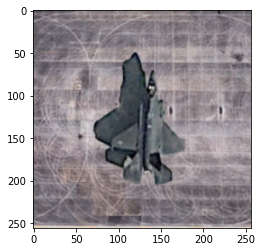

In [7]:
img_idx = 0

# Verifying dataloader is applying transform.
print(dm.train_dataset[img_idx][0].numpy().shape)

# View the image.
image = np.transpose(dm.train_dataset[img_idx][0].numpy(), (1, 2, 0))
plt.imshow(image)